# Lecture 3 -- Matrix Rank, Inverses, and Least Squares

In [1]:
import numpy as np
import numpy.linalg as la # matrix rank, inverse
import numpy.random as rnd # generate noise in simulated data
import matplotlib.pyplot as plt # plots

### Matrix rank

In [2]:
X1 = np.array([[1, 1, 0, 0, 0],[0, 1, 2, 0, 3],[0, 5, 0, 6, 0]])
print("X1 = \n%s" % np.matrix(X1))
print("rank(X1) = %d\n\n" % la.matrix_rank(X1))

X2 = np.array([[1, 0],[0, 1],[0, 1]])
print("X2 = \n%s" % np.matrix(X2))
print("rank(X2) = %d\n\n" % la.matrix_rank(X2))

X3 = np.array([[1, 0, 1],[0, 1, 1],[0, 1, 1]])
print("X3 = \n%s" % np.matrix(X3))
print("rank(X3) = %d\n\n" % la.matrix_rank(X3))




X1 = 
[[1 1 0 0 0]
 [0 1 2 0 3]
 [0 5 0 6 0]]
rank(X1) = 3


X2 = 
[[1 0]
 [0 1]
 [0 1]]
rank(X2) = 2


X3 = 
[[1 0 1]
 [0 1 1]
 [0 1 1]]
rank(X3) = 2




## Matrix inverse

In [3]:
A1 = np.array([[.25, 0],[0,2]])
print("A1 = \n%s\n" % np.matrix(A1))
print("A1^{-1} = \n%s\n\n" % la.inv(A1))

A2 = np.array([[1, 2],[3,4]])
print("A2 = \n%s\n" % np.matrix(A2))
print("A2^{-1} = \n%s\n\n" % la.inv(A2))

A3 = np.array([[1, 2],[2,4]])
print("A3 = \n%s\n" % np.matrix(A3))
print("A3^{-1} = \n%s\n\n"%la.inv(A3)) # this inverse does not exist and we expect an error


A1 = 
[[0.25 0.  ]
 [0.   2.  ]]

A1^{-1} = 
[[4.  0. ]
 [0.  0.5]]


A2 = 
[[1 2]
 [3 4]]

A2^{-1} = 
[[-2.   1. ]
 [ 1.5 -0.5]]


A3 = 
[[1 2]
 [2 4]]



LinAlgError: ignored

## Least squares example

In [4]:
## generate data

n = 10
X1 = np.ones((n))
z = np.arange(n)/n
X = np.vstack((X1, z)).T
print("X = \n%s\n\n" % X)

w = np.matrix([[1],[2]])
print("w = \n%s\n\n" % w)

noise_std = .3
noise = rnd.normal(size=(n,1))*noise_std
print("noise = \n%s\n\n" % noise)

y = X@w + noise
print("X@w = \n%s\n\n" % (X@w))
print("y = \n%s\n\n" % y)

## least squares estimation

w_hat = la.inv(X.T@X)@X.T@y
print("w_hat = \n%s\n\n" % w_hat)

## test data and predictions

n_test = 100;
X1_test = np.ones((n_test))
z_test = np.linspace(0,1,n_test)
X_test = np.vstack((X1_test,z_test)).T
y_test = X_test@w
y_predict = X_test@w_hat


X = 
[[1.  0. ]
 [1.  0.1]
 [1.  0.2]
 [1.  0.3]
 [1.  0.4]
 [1.  0.5]
 [1.  0.6]
 [1.  0.7]
 [1.  0.8]
 [1.  0.9]]


w = 
[[1]
 [2]]


noise = 
[[-0.09462526]
 [-0.02415899]
 [-0.3979385 ]
 [ 0.5640157 ]
 [ 0.15375613]
 [-0.53082575]
 [ 0.47182658]
 [ 0.18768294]
 [ 0.22558764]
 [-0.04898535]]


X@w = 
[[1. ]
 [1.2]
 [1.4]
 [1.6]
 [1.8]
 [2. ]
 [2.2]
 [2.4]
 [2.6]
 [2.8]]


y = 
[[0.90537474]
 [1.17584101]
 [1.0020615 ]
 [2.1640157 ]
 [1.95375613]
 [1.46917425]
 [2.67182658]
 [2.58768294]
 [2.82558764]
 [2.75101465]]


w_hat = 
[[0.93810778]
 [2.25005718]]




## plot results

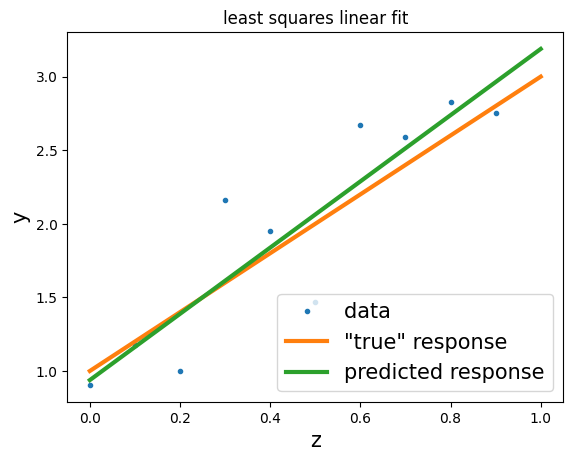

In [5]:
plt.plot (z, y, '.', z_test, y_test, z_test, y_predict, linewidth =3)
plt.legend ([ 'data ', '"true" response', 'predicted response'], loc='lower right', fontsize=15)
plt.title ('least squares linear fit')
plt.xlabel ('z', fontsize=15)
plt.ylabel ('y', fontsize=15)
plt.show ()